In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

f_orgnl - best 7: 0.6881390593047034; rf: 0.7310657596371882; best k-nn (33): 0.6229326513213981
f_op_1 - best : ; rf: ; best k-nn (): 
f_op_2 - best : ; rf: ; best k-nn (): 
f_op_3 - best : ; rf: ; best k-nn (): 

In [3]:
# Load the data
sti_features = 'features_original.csv'
data = pd.read_csv(sti_features)

In [4]:


# Assuming 'data' and 'y' are already defined
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'black_presence', 'atypicturesal', 'blue-whiteveils', 'asymmetry_values']]
X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y=data['cancer_or_not']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = RFE(LogisticRegression(), n_features_to_select=7) # Selects the top 5 features
X_selected = selector.fit_transform(X_scaled, y)
clf = LogisticRegression().fit(X_selected, y)
# Train the model




# Get probabilities of the positive class
probabilities = clf.predict_proba(X_selected)[:, 1]

threshold = 0.53
predictions = np.where(probabilities >= threshold, 1, 0)  # 1 if >= 0.6 else 0


# Print new predictions with custom threshold
#print(predictions)

# Evaluate model
print("Accuracy:", accuracy_score(y, predictions))
print("Precision:", precision_score(y, predictions))
print("Recall:", recall_score(y, predictions))
print("F1 Score:", f1_score(y, predictions))


seleced_features_after = []
for x in range(len(selector.support_)):
    if selector.support_[x] == True:
        seleced_features_after.append(X.columns.values[x])
        
        
seleced_features_after

Accuracy: 0.6881390593047034
Precision: 0.727580372250423
Recall: 0.7491289198606271
F1 Score: 0.7381974248927039


['H_value',
 'S_value',
 'blue_presence',
 'pink_presence',
 'atypical_pigment_network',
 'blue-white_veil',
 'asymmetry_values']

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y, predictions)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[243 161]
 [144 430]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       404
           1       0.73      0.75      0.74       574

    accuracy                           0.69       978
   macro avg       0.68      0.68      0.68       978
weighted avg       0.69      0.69      0.69       978



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data
#sti_features = '/Users/sunechristiansen/sune/ds_project/mdasm-2024/features.csv'
#data = pd.read_csv(sti_features)
#data = combined_df

# Separate features and target
feature_columns= ['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']
#feature_columns = ['H_value', 'V_value', 'white_presence', 'blue-white_veil', 'asymmetry_values']
X = data[feature_columns]
y = data['cancer_or_not']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Initialize the scaler
scaler = StandardScaler()
# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)


accuracies = list()
n=15
classifier="rf"

for i in range(n):
    # Initialize the Random Forest classifier
    rf_classifier=0
    if classifier == "rf":
        rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=5, bootstrap=True)
    elif classifier == "kn":
        rf_classifier = KNeighborsClassifier(n_neighbors=25)
    # Train the model using the scaled feature columns
    rf_classifier.fit(X_train_scaled, y_train)
    # Make predictions using the scaled test feature columns
    predictions = rf_classifier.predict(X_test_scaled)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    #print(f'Accuracy of the Random Forest classifier is: {accuracy:.2f}')
print(sum(accuracies)/len(accuracies))

0.6943310657596372


<Figure size 640x480 with 0 Axes>

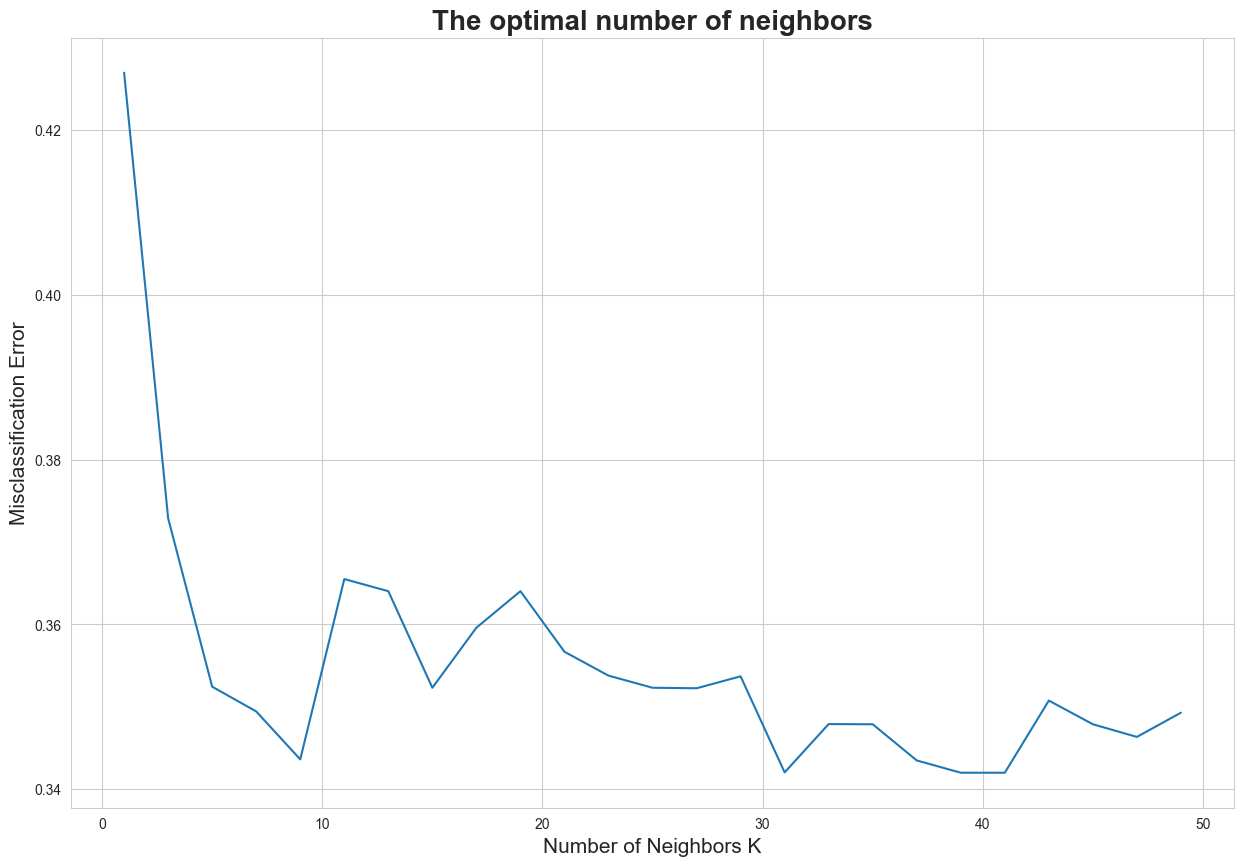

The optimal number of neighbors is 39.
0.6580136402387042


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
knn_cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn_cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in knn_cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)
print(max(knn_cv_scores))

<Figure size 640x480 with 0 Axes>

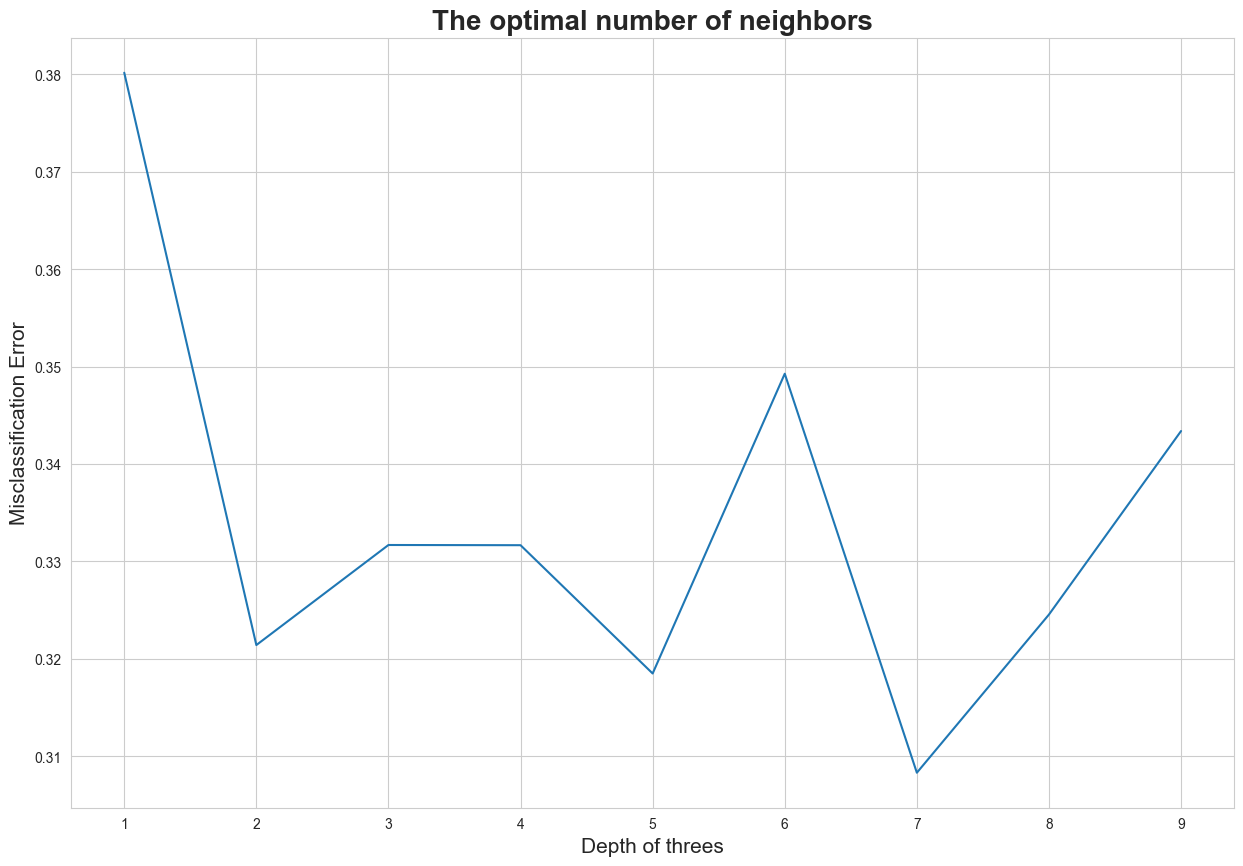

The optimal number of neighbors is 7.
0.691687979539642


In [9]:
rf_cv_scores = []
rf_list=list(range(1,10))
for i in rf_list:
    rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=i, bootstrap=True)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')
    rf_cv_scores.append(scores.mean())

MSE = [1 - x for x in rf_cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal tree depth', fontsize=20, fontweight='bold')
plt.xlabel('Depth of threes', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(rf_list, MSE)

plt.show()

best_rf = rf_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_rf)
print(max(rf_cv_scores))